# Phase 1: Getting Started & Data Exploration

### 1.1: Import pandas and Load the Dataset

In [69]:
import pandas as pd

In [70]:
import os
os.getcwd()

'C:\\Users\\praveen006\\salary-prediction-app\\notebooks'

In [71]:
df = pd.read_csv(r"../salary_data_profession.csv")

In [72]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [73]:
df.rename(columns={
    'Education Level': 'Education',
    'Years of Experience': 'Experience',
    'Job Title': 'Job_Title'
}, inplace=True)

In [74]:
df.head()

,Age,Gender,Education,Job_Title,Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [75]:
df.tail()

,Age,Gender,Education,Job_Title,Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [76]:
df.shape

(375, 6)

In [77]:
df.columns

Index(['Age', 'Gender', 'Education', 'Job_Title', 'Experience', 'Salary'], dtype='object')

### 1.2: Inspecting the Data

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         373 non-null    float64
 1   Gender      373 non-null    object 
 2   Education   373 non-null    object 
 3   Job_Title   373 non-null    object 
 4   Experience  373 non-null    float64
 5   Salary      373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [79]:
df.describe()

,Age,Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [80]:
df.isnull().sum()

Age           2
Gender        2
Education     2
Job_Title     2
Experience    2
Salary        2
dtype: int64

# Phase 2: Data Visualization & Analysis

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1: Analyzing Experience vs. Salary

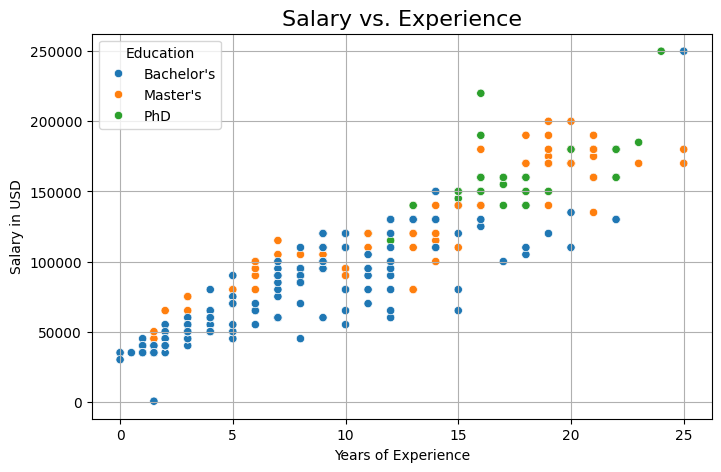

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Experience', y='Salary', hue='Education', data=df)

plt.title('Salary vs. Experience', fontsize=16)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in USD')
plt.grid(True)

plt.show()

### 2.2: Analyzing Age vs. Salary

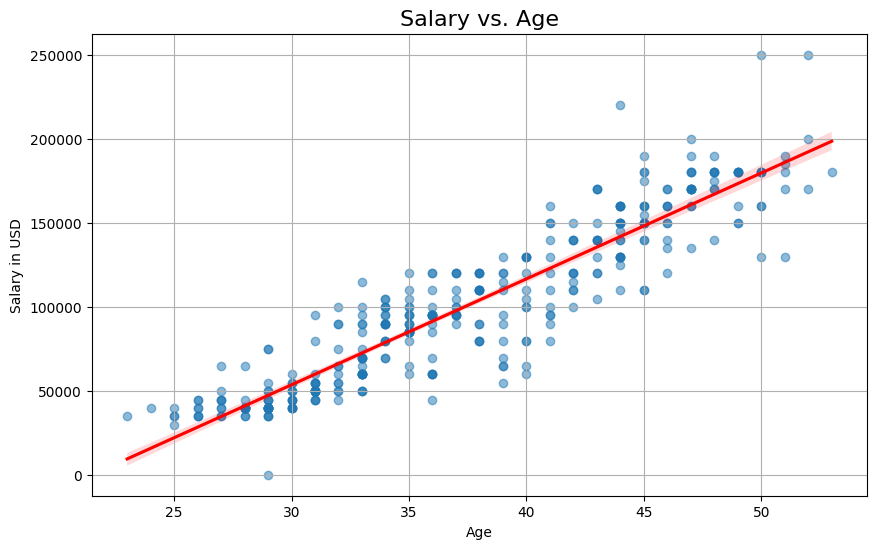

In [83]:
# Create a scatter plot with a regression line for Age vs. Salary
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Age',
    y='Salary',
    data=df,
    scatter_kws={'alpha': 0.5}, # Make points semi-transparent
    line_kws={"color": "red"}   # Make the trend line red
)

plt.title('Salary vs. Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Salary in USD')
plt.grid(True)

In [84]:
### 2.3: Analyzing Education vs. Salary

In [85]:
# Create a dictionary to define the replacements
replacements = {
    "Bachelor's": "Bachelors",
    "Master's": "Masters"
}

# Apply the replacements to the 'Education' column
df['Education'] = df['Education'].replace(replacements)

In [86]:
df.Education.value_counts()

Education
Bachelors    224
Masters       98
PhD           51
Name: count, dtype: int64

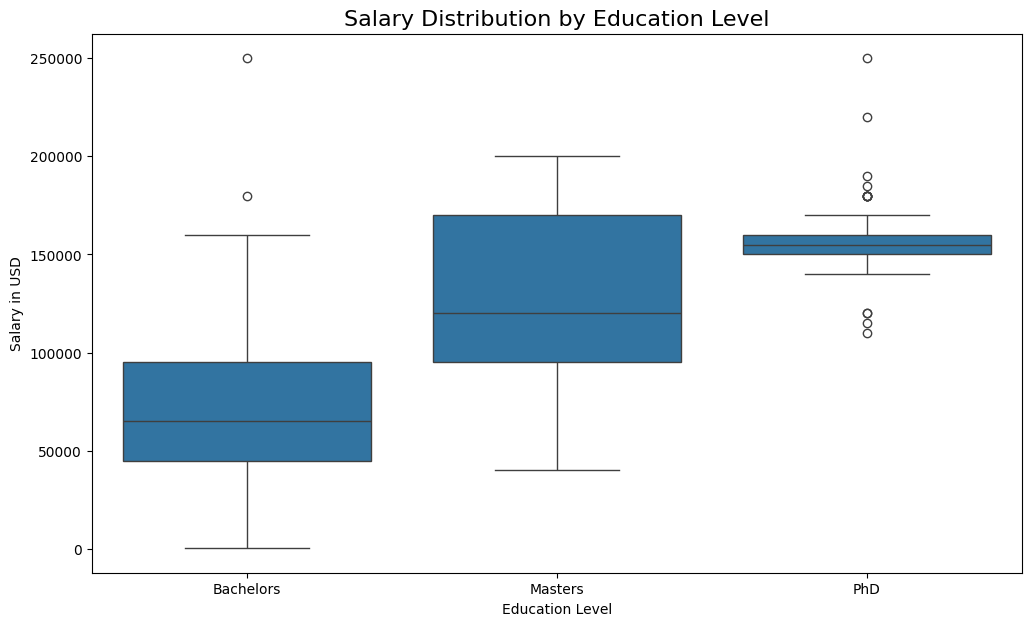

In [87]:
plt.figure(figsize=(12, 7))
edu_order = ['Bachelors', 'Masters', 'PhD']

sns.boxplot(
    x='Education',
    y='Salary',
    data=df,
    order=edu_order
)

plt.title('Salary Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level')
plt.ylabel('Salary in USD')

plt.show()

### 2.4: Analyzing Job Title vs. Salary

In [88]:
num_job_titles = df['Job_Title'].nunique()

top_10_jobs = df['Job_Title'].value_counts().head(10)

print(f"There are {num_job_titles} unique job titles in the dataset.")
print("\n--- Top 10 Most Common Job Titles ---")
print(top_10_jobs)

There are 174 unique job titles in the dataset.

--- Top 10 Most Common Job Titles ---
Job_Title
Director of Marketing                    12
Director of Operations                   11
Senior Business Analyst                  10
Senior Marketing Analyst                  9
Senior Marketing Manager                  9
Junior Business Analyst                   8
Senior Financial Analyst                  7
Junior Financial Analyst                  7
Junior Business Development Associate     7
Senior Project Manager                    7
Name: count, dtype: int64


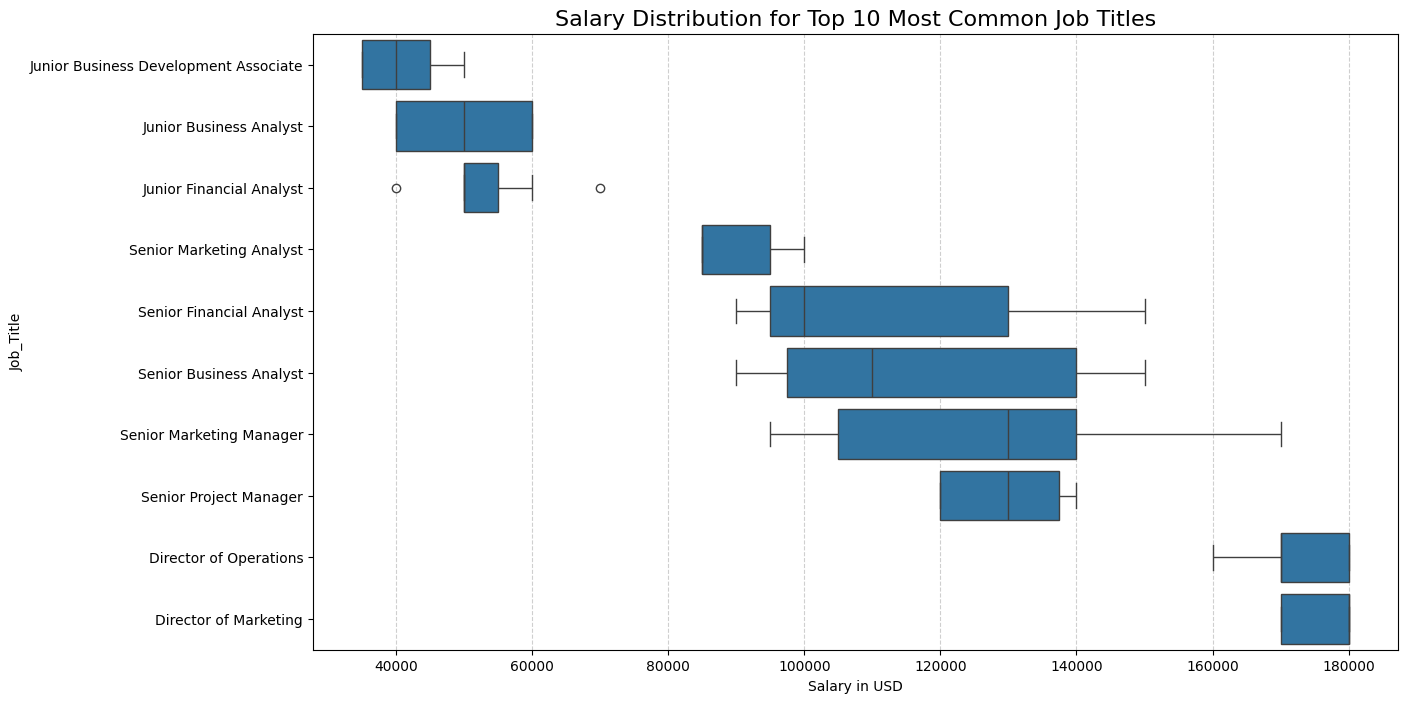

In [89]:
# --- Step 1: Find the Top 10 most common job titles ---
top_10_jobs = df['Job_Title'].value_counts().head(10).index

# --- Step 2: Filter the DataFrame to include only these top 10 jobs ---
df_top10 = df[df['Job_Title'].isin(top_10_jobs)]

# --- Step 3: Calculate the median salary for each job to determine the order ---
# This makes our plot much easier to read
order = df_top10.groupby('Job_Title')['Salary'].median().sort_values().index

# --- Step 4: Create the Box Plot ---
plt.figure(figsize=(14, 8)) # Use a larger figure size for readability
sns.boxplot(
    x='Salary',
    y='Job_Title',
    data=df_top10,
    order=order # Apply the sorted order
)

plt.title('Salary Distribution for Top 10 Most Common Job Titles', fontsize=16)
plt.xlabel('Salary in USD')
plt.ylabel('Job_Title')
plt.grid(axis='x', linestyle='--', alpha=0.6) # Add a grid for the x-axis

plt.show()

### 2.5: Analyzing Gender vs. Salary

Text(0, 0.5, 'Salary in USD')

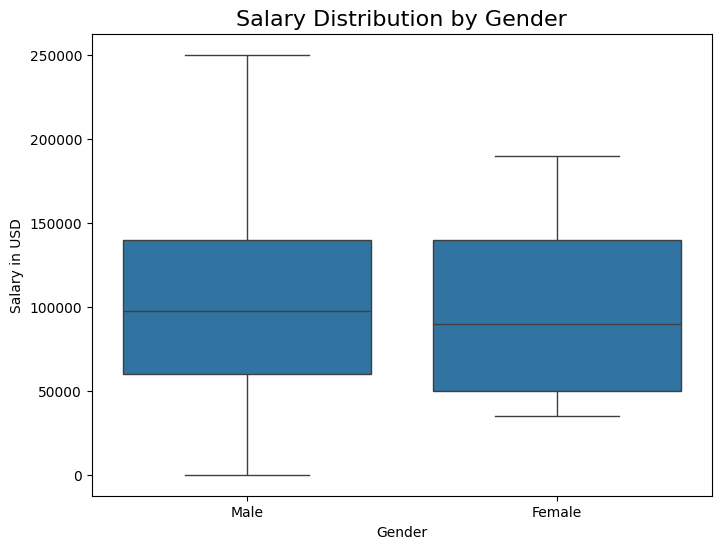

In [90]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='Gender',
    y='Salary',
    data=df
)

plt.title('Salary Distribution by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Salary in USD')

# Phase 3: Feature Engineering & Preparation

### 3.1: Final Data Cleaning (Handling Missing Values)

In [91]:
df.shape

(375, 6)

In [92]:
df.dropna(inplace=True)
df.shape

(373, 6)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         373 non-null    float64
 1   Gender      373 non-null    object 
 2   Education   373 non-null    object 
 3   Job_Title   373 non-null    object 
 4   Experience  373 non-null    float64
 5   Salary      373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


### Step 1: Create the Job_Level Feature

In [94]:
# First, we define a function that will look at a job title and assign a number.
def assign_job_level(job_title):
    # We make the text lowercase to ensure our check works consistently (e.g., 'Director' and 'director' are treated the same)
    job_title = str(job_title).lower() 
    
    if 'director' in job_title:
        return 5 # Highest level
    elif 'senior' in job_title or 'manager' in job_title:
        return 4
    elif 'analyst' in job_title:
        return 3
    elif 'engineer' in job_title or 'developer' in job_title:
        return 2
    else:
        return 1 # Junior or other roles

# Now, we apply this function to every row in the 'Job_Title' column to create our new column.
df['Job_Level'] = df['Job_Title'].apply(assign_job_level)

# --- Verification Step ---
# Let's look at the first few rows to see our new 'Job_Level' column.
print("--- New 'Job_Level' column created ---")
print(df[['Job_Title', 'Job_Level']].head())

--- New 'Job_Level' column created ---
           Job_Title  Job_Level
0  Software Engineer          2
1       Data Analyst          3
2     Senior Manager          4
3    Sales Associate          1
4           Director          5


### Step 2: Create the Experience_x_Level Interaction Feature

In [95]:
# We create the new feature by simply multiplying the 'Experience' and 'Job_Level' columns.
# Note: The column name in your data is 'Experience', not 'Years of Experience'.
df['Experience_x_Level'] = df['Experience'] * df['Job_Level']

# --- Verification Step ---
# Let's look at the data again to see our powerful new interaction feature.
print("--- New 'Experience_x_Level' column created ---")
print(df[['Experience', 'Job_Level', 'Experience_x_Level']].head())

--- New 'Experience_x_Level' column created ---
   Experience  Job_Level  Experience_x_Level
0         5.0          2                10.0
1         3.0          3                 9.0
2        15.0          4                60.0
3         7.0          1                 7.0
4        20.0          5               100.0


### Step 3: Clean Up by Dropping the Job_Title Column

In [96]:
# We use the .drop() method to remove the 'Job_Title' column.
# 'axis=1' tells pandas we are dropping a column, not a row.
# 'inplace=False' (the default) means it returns a new DataFrame, which we store in 'df_engineered'.
df_engineered = df.drop('Job_Title', axis=1)

# --- Verification Step ---
# Let's check the columns of our new DataFrame to confirm 'Job_Title' is gone.
print("--- 'Job_Title' column has been removed ---")
print("Remaining columns are:")
print(df_engineered.columns)

--- 'Job_Title' column has been removed ---
Remaining columns are:
Index(['Age', 'Gender', 'Education', 'Experience', 'Salary', 'Job_Level',
       'Experience_x_Level'],
      dtype='object')


### 3.2: Applying One-Hot Encoding

In [97]:
# We use pd.get_dummies on our 'df_engineered' DataFrame.
# We only need to encode the two remaining text columns: 'Gender' and 'Education'.
# Note: The column name in your data is 'Education', not 'Education Level'.
df_final = pd.get_dummies(df_engineered, columns=['Gender', 'Education'], drop_first=True)

# --- Verification Step ---
# Let's look at the first few rows of our final, fully numerical, and intelligent DataFrame!
print("--- Final, Model-Ready DataFrame ---")
print(df_final.head())

# Let's also check the final columns
print("\n--- Final Columns ---")
print(df_final.columns)

--- Final, Model-Ready DataFrame ---
    Age  Experience    Salary  Job_Level  Experience_x_Level  Gender_Male  \
0  32.0         5.0   90000.0          2                10.0         True   
1  28.0         3.0   65000.0          3                 9.0        False   
2  45.0        15.0  150000.0          4                60.0         True   
3  36.0         7.0   60000.0          1                 7.0        False   
4  52.0        20.0  200000.0          5               100.0         True   

   Education_Masters  Education_PhD  
0              False          False  
1               True          False  
2              False           True  
3              False          False  
4               True          False  

--- Final Columns ---
Index(['Age', 'Experience', 'Salary', 'Job_Level', 'Experience_x_Level',
       'Gender_Male', 'Education_Masters', 'Education_PhD'],
      dtype='object')


In [98]:
df_final.head()

,Age,Experience,Salary,Job_Level,Experience_x_Level,Gender_Male,Education_Masters,Education_PhD
0,32.0,5.0,90000.0,2,10.0,True,False,False
1,28.0,3.0,65000.0,3,9.0,False,True,False
2,45.0,15.0,150000.0,4,60.0,True,False,True
3,36.0,7.0,60000.0,1,7.0,False,False,False
4,52.0,20.0,200000.0,5,100.0,True,True,False


# Phase 4: Model Building & Training

### 4.1: Separating Features (X) and Target (y)

In [99]:
# 'X' will contain all of our new, engineered features. We drop the 'Salary' column.
X = df_final.drop('Salary', axis=1)

# 'y' will contain only the 'Salary' column, which is our target.
y = df_final['Salary']

# --- Verification Step ---
print("--- Final Features (X) ---")
print("Shape of X:", X.shape)
print("Columns in X:", X.columns) 

print("\n--- Final Target (y) ---")
print("Shape of y:", y.shape)

--- Final Features (X) ---
Shape of X: (373, 7)
Columns in X: Index(['Age', 'Experience', 'Job_Level', 'Experience_x_Level', 'Gender_Male',
       'Education_Masters', 'Education_PhD'],
      dtype='object')

--- Final Target (y) ---
Shape of y: (373,)


In [100]:
X.shape

(373, 7)

In [101]:
y.shape

(373,)

In [102]:
X.head()

,Age,Experience,Job_Level,Experience_x_Level,Gender_Male,Education_Masters,Education_PhD
0,32.0,5.0,2,10.0,True,False,False
1,28.0,3.0,3,9.0,False,True,False
2,45.0,15.0,4,60.0,True,False,True
3,36.0,7.0,1,7.0,False,False,False
4,52.0,20.0,5,100.0,True,True,False


In [103]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

### 4.2: Splitting Data into Training and Testing Sets

In [104]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# We'll stick with an 80/20 split and a random_state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# --- Verification Step ---
# Let's print the shapes of our new datasets to confirm the split.
print("--- Data Splitting Complete ---")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

--- Data Splitting Complete ---
Shape of X_train: (298, 7)
Shape of X_test: (75, 7)
Shape of y_train: (298,)
Shape of y_test: (75,)


### 4.3: Choosing and Training the Model

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Phase 5: Model Evaluation

### 5.1: Making Predictions

In [107]:
y_pred = model.predict(X_test)
y_pred

array([174129.06334962,  84941.37027693, 129594.83212612,  91933.8948979 ,
       156693.27946173, 154585.7299573 , 152797.12114291, 109804.67053056,
        59624.00864331, 107119.79801064, 138822.50382907, 148069.65121631,
        33188.25384028,  90978.8540654 , 125835.30497963,  59624.00864331,
        62819.80848591,  48232.07403913,  80854.9186569 , 106045.14338408,
       127623.91379402, 114289.31521933, 163980.40382675,  62788.08278948,
        91933.8948979 ,  55317.29420448, 168119.65542798,  48092.80470388,
       124185.46469662, 154668.17149448,  34577.39238639, 129247.43240087,
        52276.56118469, 148946.43923757,  92053.50869196,  22035.37952054,
       176941.15027872,  45917.07036429, 151403.52582629,  53487.76948087,
        38747.5531556 ,  94161.0581964 , 160028.84531846, 170579.1921495 ,
        52362.87600467, 150826.20281081, 113159.41047877,  49329.19778552,
        51275.00883488,  32383.1448936 , 161032.57975649,  82734.68223015,
       123955.54140639, 1

### 5.2: Calculating Evaluation Metrics

In [108]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): $10,370.36
R-squared (R²): 0.90


### 5.3: Training and Evaluating a Random Forest Model

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [110]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([176600.        ,  57150.        , 131400.        ,  97479.16666667,
       149420.        , 156065.23809524, 139150.        , 107449.4047619 ,
        51100.        , 100300.        , 140900.77380952, 169655.        ,
        40651.54761905,  99668.3531746 , 129700.        ,  51100.        ,
        52650.        ,  44450.        ,  91669.4047619 ,  96379.78896104,
       107994.16666667, 113137.5       , 165750.        ,  56650.        ,
        97479.16666667,  58501.66666667, 155408.57142857,  39640.125     ,
        99841.66666667, 168300.        ,  44997.26190476, 124651.66666667,
        47362.5       , 148895.77380952,  97083.87445887,  37670.29166667,
       164700.        ,  39867.83333333, 144706.66666667,  53379.16666667,
        40000.        ,  97582.08333333, 195075.        , 181650.        ,
        40545.83333333, 160000.        ,  63900.        ,  43589.88095238,
        38995.95833333,  40050.        , 171900.        ,  91710.54112554,
       129900.        , 1

In [111]:
# Calculate the evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [112]:
print("--- Random Forest Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae_rf:,.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

--- Random Forest Model Evaluation Results ---
Mean Absolute Error (MAE): $8,542.65
R-squared (R²): 0.92


In [113]:
print("\n--- For Comparison: Linear Regression Results ---")
print(f"MAE: ${mae:,.2f}") # Using the 'mae' variable we calculated before
print(f"R²: {r2:.2f}") # Using the 'r2' variable we calculated before


--- For Comparison: Linear Regression Results ---
MAE: $10,370.36
R²: 0.90


### 5.4: Training and Evaluating a Gradient Boosting Model

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

# We'll use similar parameters to the Random Forest for a fair comparison
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [115]:
y_pred_gb = gb_model.predict(X_test)
y_pred_gb

array([177743.18125939,  62939.00138641, 134844.1931885 ,  95939.00561027,
       144931.49256452, 150681.86150505, 133939.26397151, 106941.7963801 ,
        51222.37380757, 105441.6659218 , 133217.58915888, 173491.32062538,
        40488.30875627, 104608.4062582 , 137196.48365579,  51222.37380757,
        52437.11165607,  45293.36141831,  91109.19212953,  98011.60418729,
       117157.95963231, 109570.51763538, 180187.6839059 ,  60407.21082755,
        95939.00561027,  57646.33532573, 154298.301109  ,  40006.34072015,
       106622.52427081, 165555.66253476,  47348.37312529, 129674.17674934,
        49145.19621157, 151054.68145968, 100529.29249301,  37163.70660006,
       156297.64985563,  40488.30875627, 141865.7903548 ,  54469.89125312,
        38691.48566999, 104608.4062582 , 183629.88228889, 183482.53861849,
        42529.55302893, 158248.72889597,  88865.46238253,  48834.95620249,
        40006.34072015,  38691.48566999, 168491.63731901,  90610.53837317,
       131659.76875274, 1

In [116]:
# Calculate the evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [117]:
# --- Print the Results for Final Comparison ---
print("--- Gradient Boosting Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae_gb:,.2f}")
print(f"R-squared (R²): {r2_gb:.2f}")

print("\n--- For Comparison: Random Forest Results ---")
print(f"MAE: ${mae_rf:,.2f}") # Using the 'mae_rf' variable from the last step
print(f"R²: {r2_rf:.2f}")     # Using the 'r2_rf' variable from the last step

--- Gradient Boosting Model Evaluation Results ---
Mean Absolute Error (MAE): $9,095.08
R-squared (R²): 0.92

--- For Comparison: Random Forest Results ---
MAE: $8,542.65
R²: 0.92


# Phase 6: Saving the Final Model

In [118]:
import pickle
import os
from sklearn.ensemble import RandomForestRegressor

# --- 1. Train the Final Model on ALL Engineered Data ---
print("Training the final model on all engineered data...")
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y) # We use the full X and y DataFrames
print("Final model training complete!")


# --- 2. Save the Final Model and Columns ---
output_dir = '../saved_models'
os.makedirs(output_dir, exist_ok=True)

# Save the final, retrained model
model_path = os.path.join(output_dir, 'salary_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(final_model, f)

# Save the columns
columns_path = os.path.join(output_dir, 'model_columns.pkl')
model_columns = X.columns
with open(columns_path, 'wb') as f:
    pickle.dump(model_columns, f)

# --- Verification Step ---
print("\n--- BEST Model and Columns Saved Successfully! ---")
print(f"Model saved to: {model_path}")
print(f"Columns saved to: {columns_path}")

Training the final model on all engineered data...
Final model training complete!

--- BEST Model and Columns Saved Successfully! ---
Model saved to: ../saved_models\salary_model.pkl
Columns saved to: ../saved_models\model_columns.pkl


### Model Comparison Analysis

After training and evaluating three different models, we can compare their performance to select the best one for our final application.

| Model              | R-squared (R²) | Mean Absolute Error (MAE) |
|-------------------|----------------|----------------------------|
| Linear Regression | 0.90           | \$10,370.36                |
| Random Forest     | 0.92           | \$8,542.65                 |
| Gradient Boosting | 0.92           | \$9,095.08                 |

**Conclusion:**

* **Best R-squared:** Both the Random Forest and Gradient Boosting models achieved the highest R-squared score of **0.92**. This means they can explain 92% of the variation in salary, making them more accurate than the simple Linear Regression model.
* **Lowest Error (MAE):** The **Random Forest Regressor** has the lowest Mean Absolute Error of **$8,542.65**. This means its predictions are, on average, the most precise and closest to the actual salary.

Based on these results, the **Random Forest Regressor is the clear winner**. It provides the best combination of high accuracy (R²) and low prediction error (MAE). We will choose this as our final model to save and deploy in the Streamlit app.